In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Sourabh\Downloads\breast+cancer+wisconsin+original\breast-cancer-wisconsin.data")

In [3]:
a = ['Sample code number','Clump Thickness' ,'Uniformity of Cell Size' ,'Uniformity of Cell Shape' ,'Marginal Adhesion' ,'Single Epithelial Cell Size' ,'Bare Nuclei' ,'Bland Chromatin' ,'Normal Nucleoli' ,'Mitoses' ,'Class']


In [4]:
df.columns=a

In [5]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
import numpy as np

In [8]:

df['Bare Nuclei'] = df["Bare Nuclei"].replace("?",np.nan).astype(float) 


In [9]:
df.isna().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [10]:
df['Bare Nuclei'].fillna(df['Bare Nuclei'].mode()[0],inplace = True) # one column at a time bb

In [11]:
df.drop('Sample code number',axis=1,inplace=True)

In [12]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

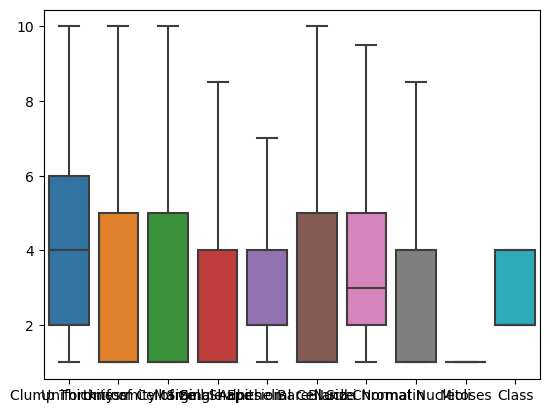

In [14]:
import seaborn as sns
sns.boxplot(data=df)

In [15]:
df['Class'].replace({2:'Benign',4:'Malignant'},inplace=True)

In [16]:
a=['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']

for i in a:
    df[i]=pd.cut(df[i],bins=[0,4,7,10],labels=['Low','Medium','High'])

In [17]:
Qualitative_Variable = df[df.select_dtypes(include=['object','category']).columns.tolist()]
Qualitative_Variable.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,Medium,Low,Low,Medium,Medium,High,Low,Low,Low,Benign
1,Low,Low,Low,Low,Low,Low,Low,Low,Low,Benign
2,Medium,High,High,Low,Low,Low,Low,Medium,Low,Benign
3,Low,Low,Low,Low,Low,Low,Low,Low,Low,Benign
4,High,High,High,High,Medium,High,High,Medium,Low,Malignant


In [18]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,2,1,1,2,1,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,0
2,2,0,0,1,0,1,1,2,0,0
3,1,1,1,1,0,1,1,1,0,0
4,0,0,0,0,1,0,0,2,0,1


In [20]:
Qualitative_Variable['Mitoses'].value_counts()

0    698
Name: Mitoses, dtype: int64

In [21]:
a=Qualitative_Variable

In [22]:
a.drop('Mitoses',axis=1,inplace=True)

In [23]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = a.drop('Class', axis = 1)
Y = a[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=56)

In [31]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()  
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

In [32]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli
123,1,2,1,2,2,1,2,0,0
469,0,1,1,1,1,0,1,1,1
521,1,0,1,2,1,0,2,2,1
82,0,1,1,1,1,0,1,2,1
232,1,0,1,2,2,1,0,1,1


In [33]:
independent_variable = list(train.columns[1:])
independent_variable

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli']

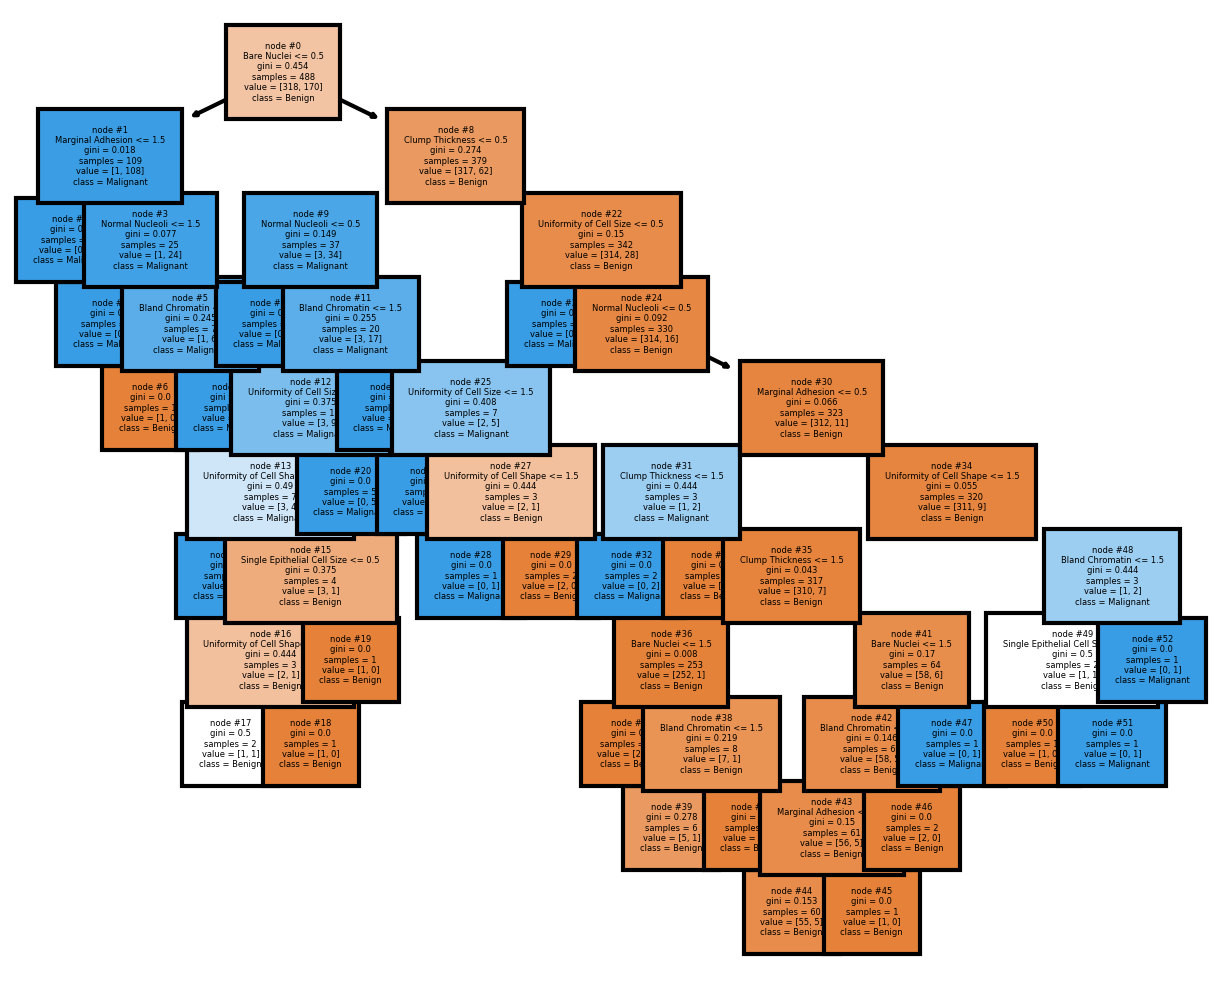

In [39]:
from sklearn import tree
import matplotlib.pyplot as plt

churn = ['Benign', 'Malignant']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [40]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Predicted
123,1,2,1,2,2,1,2,0,0,1
469,0,1,1,1,1,0,1,1,1,0
521,1,0,1,2,1,0,2,2,1,1
82,0,1,1,1,1,0,1,2,1,0
232,1,0,1,2,2,1,0,1,1,1


In [41]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Class'])
print(matrix)

[[318   7]
 [  0 163]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       318
           1       1.00      0.96      0.98       170

    accuracy                           0.99       488
   macro avg       0.99      0.98      0.98       488
weighted avg       0.99      0.99      0.99       488



In [46]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=150, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=150)

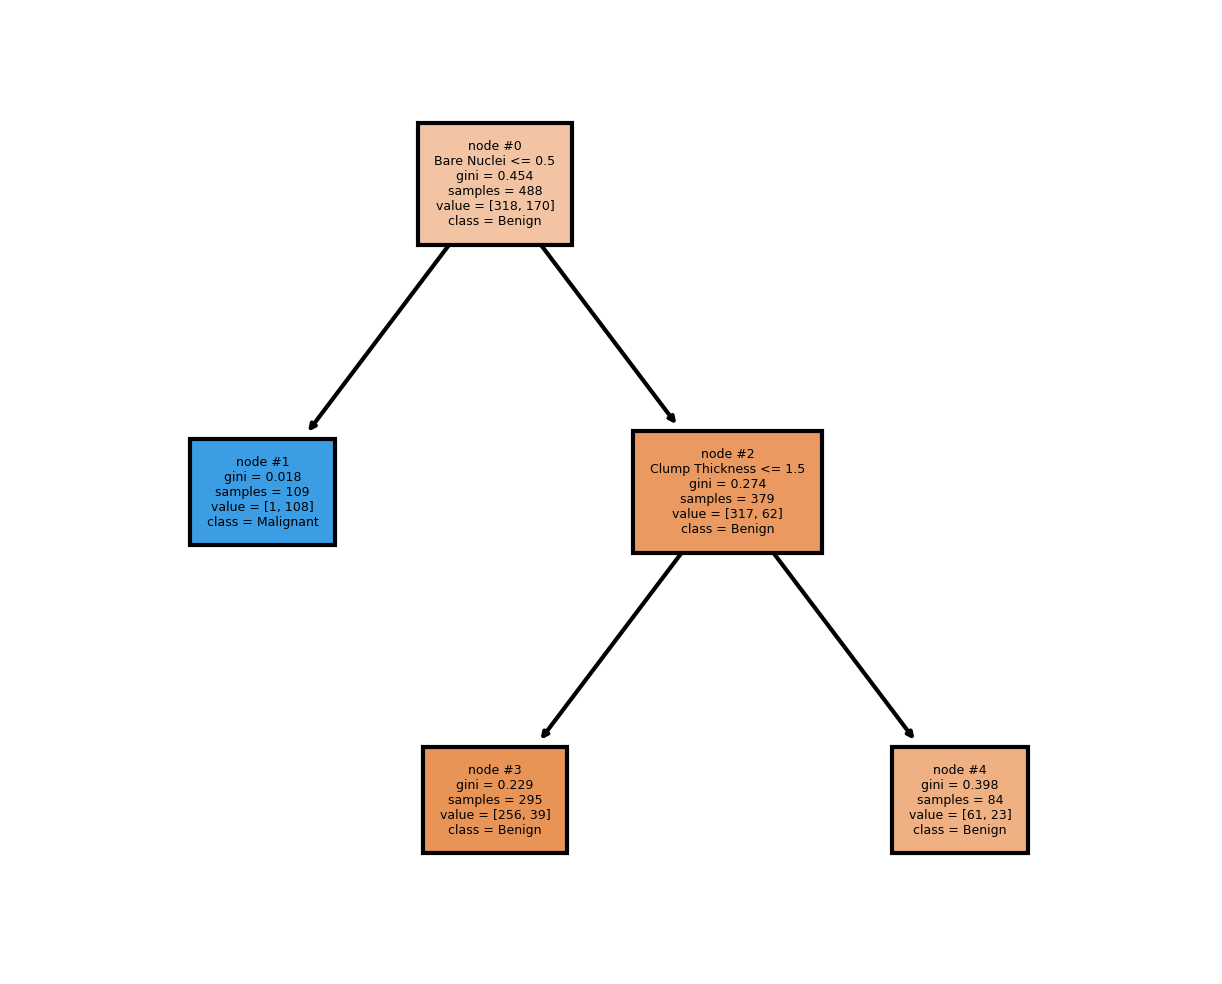

In [47]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['Benign', 'Malignant']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
               node_ids = True, # node number
               fontsize=3); # 
#fig.savefig('imagename.png')

In [48]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Predicted
123,1,2,1,2,2,1,2,0,0,0
469,0,1,1,1,1,0,1,1,1,0
521,1,0,1,2,1,0,2,2,1,0
82,0,1,1,1,1,0,1,2,1,0
232,1,0,1,2,2,1,0,1,1,1


In [49]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Class'])
print(matrix)

[[317  62]
 [  1 108]]


In [50]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       318
           1       0.99      0.64      0.77       170

    accuracy                           0.87       488
   macro avg       0.91      0.82      0.84       488
weighted avg       0.89      0.87      0.86       488



In [51]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Class
325,0,1,1,1,0,0,2,1,1
27,1,1,1,1,0,1,1,1,0
592,2,1,1,1,0,1,1,1,0
498,1,1,1,1,0,1,1,1,0
507,2,1,1,1,0,1,1,1,0


In [52]:
test['Predicted'] = dt.predict(X_test)
test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Class,Predicted
325,0,1,1,1,0,0,2,1,1,1
27,1,1,1,1,0,1,1,1,0,0
592,2,1,1,1,0,1,1,1,0,0
498,1,1,1,1,0,1,1,1,0,0
507,2,1,1,1,0,1,1,1,0,0


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Class'])
print(confusion_matrix)

[[135  22]
 [  4  49]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(test['Class'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       139
           1       0.92      0.69      0.79        71

    accuracy                           0.88       210
   macro avg       0.89      0.83      0.85       210
weighted avg       0.88      0.88      0.87       210



In [55]:
params = { 'min_samples_split': [300,150,250,450], ## Parent 
           'min_samples_leaf': [50,60,70], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [300, 150, 250, 450]},
             verbose=1)

In [57]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=300,
                       random_state=42)

In [58]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=300, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=300)

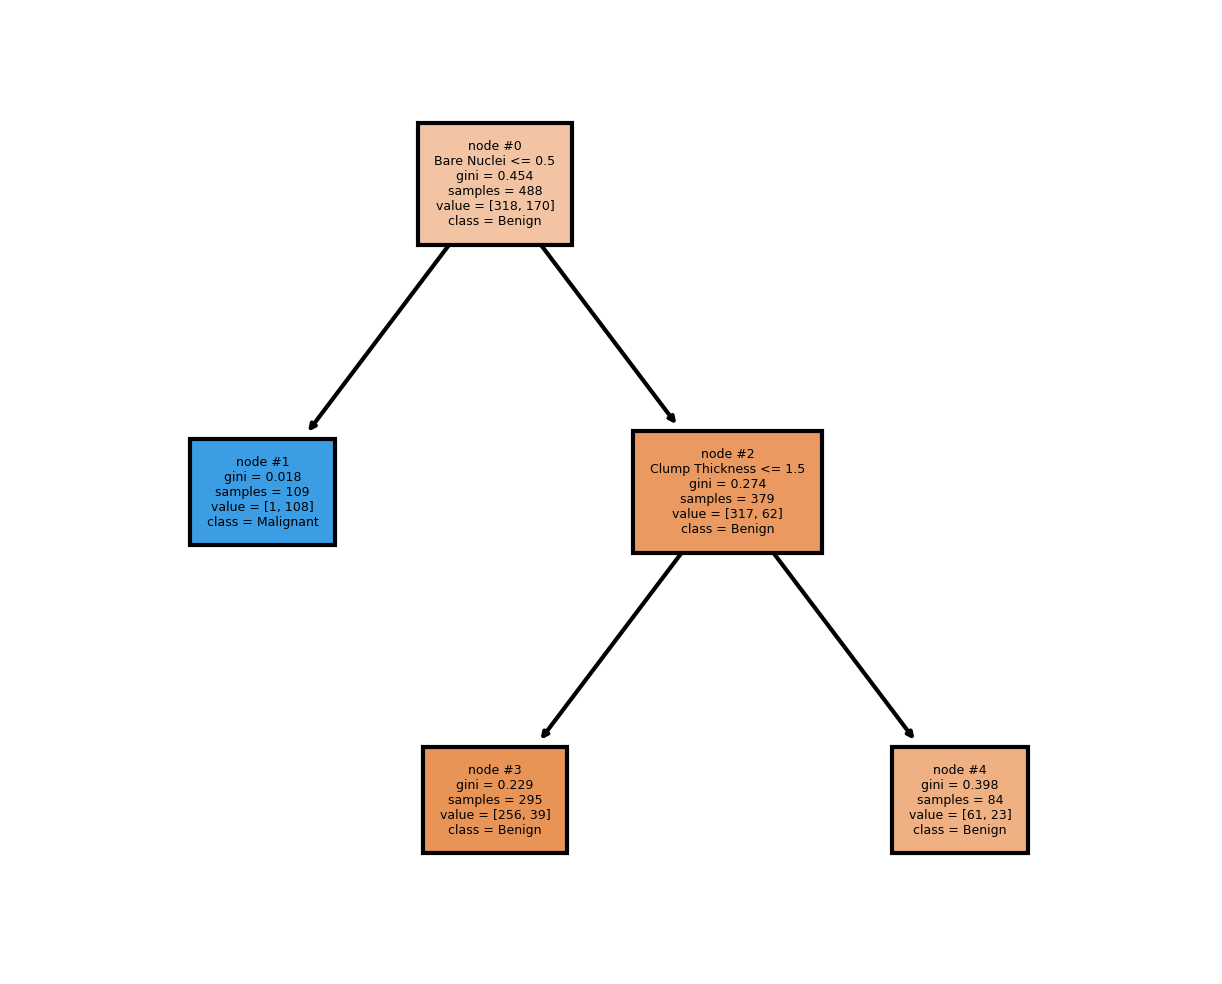

In [59]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['Benign', 'Malignant']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
               node_ids = True, # node number
               fontsize=3); # 
#fig.savefig('imagename.png')

In [60]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Predicted
123,1,2,1,2,2,1,2,0,0,0
469,0,1,1,1,1,0,1,1,1,0
521,1,0,1,2,1,0,2,2,1,0
82,0,1,1,1,1,0,1,2,1,0
232,1,0,1,2,2,1,0,1,1,1


In [62]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Class'])
print(matrix)

[[317  62]
 [  1 108]]


In [63]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       318
           1       0.99      0.64      0.77       170

    accuracy                           0.87       488
   macro avg       0.91      0.82      0.84       488
weighted avg       0.89      0.87      0.86       488



In [64]:
test['Predicted'] = dt.predict(X_test)
test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Class,Predicted
325,0,1,1,1,0,0,2,1,1,1
27,1,1,1,1,0,1,1,1,0,0
592,2,1,1,1,0,1,1,1,0,0
498,1,1,1,1,0,1,1,1,0,0
507,2,1,1,1,0,1,1,1,0,0


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Class'])
print(confusion_matrix)

[[135  22]
 [  4  49]]


In [66]:
from sklearn.metrics import classification_report
print(classification_report(test['Class'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       139
           1       0.92      0.69      0.79        71

    accuracy                           0.88       210
   macro avg       0.89      0.83      0.85       210
weighted avg       0.88      0.88      0.87       210

